# Merge data and preprocessing

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

### drilling

In [2]:
drilling = pd.read_csv('../Data/drilling_data.csv')
drilling

Date&Time  Bit depth (m)  Total RPM  Hook height (m)  \
0      2018-09-07 04:51:55       3004.038    188.138            9.661   
1      2018-09-07 04:52:00       3004.072    187.792            9.627   
2      2018-09-07 04:52:05       3004.101    188.138            9.599   
3      2018-09-07 04:52:10       3004.135    188.138            9.564   
4      2018-09-07 04:52:15       3004.169    188.138            9.530   
...                    ...            ...        ...              ...   
31925  2018-09-10 18:12:50       4354.642    248.874            3.762   
31926  2018-09-10 18:12:55       4354.642    248.874            3.762   
31927  2018-09-10 18:13:00       4354.642    249.394            3.762   
31928  2018-09-10 18:13:05       4354.642    248.701            3.762   
31929  2018-09-10 18:13:10       4354.642    248.909            3.762   

       Torque on bit (lbf.ft)  Tension (klbf)  Motor RPM  Mud flow (l/mn)  \
0                   373.80034         158.899    128.138          985.680   
1                   392.90055         158.786    127.792          983.016   
2                   463.13509         158.745    128.138          985.680   
3                   479.88368         158.648    128.138          985.680   
4                   511.50416         158.599    128.138          985.680   
...                       ...             ...        ...              ...   
31925               583.03324         164.580    138.874         1068.264   
31926               540.42066         164.874    138.874         1070.928   
31927               484.88183         165.122    139.394         1067.820   
31928               461.07838         165.353    138.701         1068.708   
31929               426.34411         165.668    138.909         1068.886   

       SPP (psi)  RPM top (rpm)  Surface Torque (lbf.ft)  ROP (m/h)  \
0       3250.698           60.0                 4496.047     17.971   
1       3260.523           60.0                 4844.050     19.200   
2       3275.646           60.0                 4712.049     20.086   
3       3280.648           60.0                 4770.050     21.128   
4       3289.976           60.0                 4860.051     21.423   
...          ...            ...                      ...        ...   
31925   4252.939          110.0                 5284.055     12.377   
31926   4239.285          110.0                 5272.055     10.658   
31927   4227.398          110.0                 5083.386      8.939   
31928   4219.808          110.0                 4992.719      7.220   
31929   4207.843          110.0                 4932.585      5.501   

       WOB (klbf)  
0           3.675  
1           3.844  
2           3.900  
3           3.940  
4           4.013  
...           ...  
31925       5.992  
31926       5.670  
31927       5.330  
31928       5.223  
31929       4.767  

[31930 rows x 13 columns]

In [3]:
drilling.drop(["Date&Time"],axis=1,inplace=True)

<AxesSubplot:>

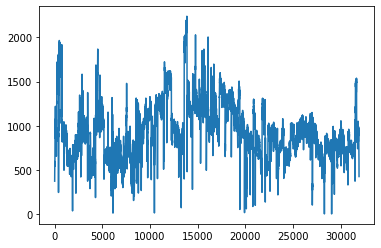

In [4]:
drilling["Torque on bit (lbf.ft)"].plot()

In [5]:
drilling["Bit depth (m)"] = drilling["Bit depth (m)"].apply(lambda x: round(x,1))

In [6]:
drilling

Bit depth (m)  Total RPM  Hook height (m)  Torque on bit (lbf.ft)  \
0             3004.0    188.138            9.661               373.80034   
1             3004.1    187.792            9.627               392.90055   
2             3004.1    188.138            9.599               463.13509   
3             3004.1    188.138            9.564               479.88368   
4             3004.2    188.138            9.530               511.50416   
...              ...        ...              ...                     ...   
31925         4354.6    248.874            3.762               583.03324   
31926         4354.6    248.874            3.762               540.42066   
31927         4354.6    249.394            3.762               484.88183   
31928         4354.6    248.701            3.762               461.07838   
31929         4354.6    248.909            3.762               426.34411   

       Tension (klbf)  Motor RPM  Mud flow (l/mn)  SPP (psi)  RPM top (rpm)  \
0             158.899    128.138          985.680   3250.698           60.0   
1             158.786    127.792          983.016   3260.523           60.0   
2             158.745    128.138          985.680   3275.646           60.0   
3             158.648    128.138          985.680   3280.648           60.0   
4             158.599    128.138          985.680   3289.976           60.0   
...               ...        ...              ...        ...            ...   
31925         164.580    138.874         1068.264   4252.939          110.0   
31926         164.874    138.874         1070.928   4239.285          110.0   
31927         165.122    139.394         1067.820   4227.398          110.0   
31928         165.353    138.701         1068.708   4219.808          110.0   
31929         165.668    138.909         1068.886   4207.843          110.0   

       Surface Torque (lbf.ft)  ROP (m/h)  WOB (klbf)  
0                     4496.047     17.971       3.675  
1                     4844.050     19.200       3.844  
2                     4712.049     20.086       3.900  
3                     4770.050     21.128       3.940  
4                     4860.051     21.423       4.013  
...                        ...        ...         ...  
31925                 5284.055     12.377       5.992  
31926                 5272.055     10.658       5.670  
31927                 5083.386      8.939       5.330  
31928                 4992.719      7.220       5.223  
31929                 4932.585      5.501       4.767  

[31930 rows x 12 columns]

## Load GR + Injectivity

In [8]:
feature = pd.read_excel('../Data/GR_injectivity.xlsx')
feature

Depth MD (m)  GR1AX(API)  Depth MD (m).1   Depth corr  \
0             544.4         0.0     1383.481138  1485.481138   
1             544.6         0.0     1384.201534  1486.201534   
2             544.8         0.0     1384.921930  1486.921930   
3             545.0         0.0     1385.642325  1487.642325   
4             545.2         0.0     1386.362721  1488.362721   
...             ...         ...             ...          ...   
19044        4353.2       141.2             NaN          NaN   
19045        4353.4       141.2             NaN          NaN   
19046        4353.6       141.2             NaN          NaN   
19047        4353.8       141.2             NaN          NaN   
19048        4354.0       141.2             NaN          NaN   

       Apparent injectivity (liters/min)  
0                                  23.85  
1                                  23.85  
2                                  -4.77  
3                                  -4.77  
4                                  -4.77  
...                                  ...  
19044                                NaN  
19045                                NaN  
19046                                NaN  
19047                                NaN  
19048                                NaN  

[19049 rows x 5 columns]

### Gamma Ray

In [9]:
GR = feature.drop(["Depth MD (m).1","Depth corr","Apparent injectivity (liters/min)"],axis=1)

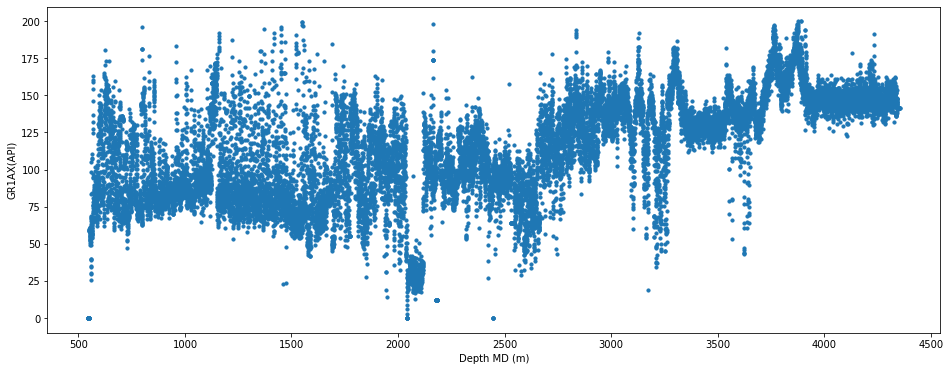

In [10]:
plt.figure(figsize=(16,6))
plt.scatter(GR["Depth MD (m)"],GR["GR1AX(API)"],s=10)
plt.xlabel('Depth MD (m)')
plt.ylabel('GR1AX(API)')
plt.show()

The interesting part is the horizontal drain

In [11]:
GR = GR[GR["Depth MD (m)"]>3004]

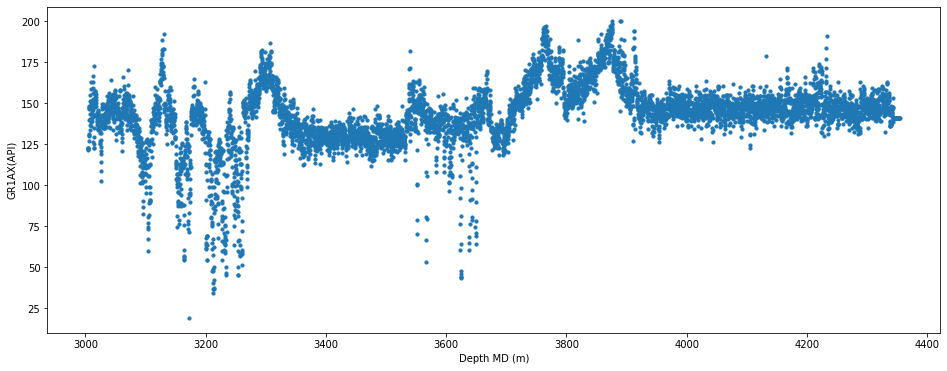

In [12]:
plt.figure(figsize=(16,6))
plt.scatter(GR["Depth MD (m)"],GR["GR1AX(API)"],s=10)
plt.xlabel('Depth MD (m)')
plt.ylabel('GR1AX(API)')
plt.show()

In [13]:
GR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6750 entries, 12299 to 19048
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Depth MD (m)  6750 non-null   float64
 1   GR1AX(API)    6750 non-null   float64
dtypes: float64(2)
memory usage: 158.2 KB


In [14]:
GR

Depth MD (m)  GR1AX(API)
12299        3004.2       121.3
12300        3004.4       122.1
12301        3004.6       122.9
12302        3004.8       122.9
12303        3005.0       122.9
...             ...         ...
19044        4353.2       141.2
19045        4353.4       141.2
19046        4353.6       141.2
19047        4353.8       141.2
19048        4354.0       141.2

[6750 rows x 2 columns]

In [167]:
len(GR["Depth MD (m)"].unique())

6750

### Injectivity

In [16]:
injectivity = feature.drop(["Depth MD (m)","GR1AX(API)","Depth MD (m).1"],axis=1)
injectivity

Depth corr  Apparent injectivity (liters/min)
0      1485.481138                              23.85
1      1486.201534                              23.85
2      1486.921930                              -4.77
3      1487.642325                              -4.77
4      1488.362721                              -4.77
...            ...                                ...
19044          NaN                                NaN
19045          NaN                                NaN
19046          NaN                                NaN
19047          NaN                                NaN
19048          NaN                                NaN

[19049 rows x 2 columns]

In [17]:
injectivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19049 entries, 0 to 19048
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Depth corr                         4118 non-null   float64
 1   Apparent injectivity (liters/min)  4118 non-null   float64
dtypes: float64(2)
memory usage: 297.8 KB


In [19]:
injectivity.dropna(inplace=True)

In [21]:
injectivity = injectivity[injectivity["Depth corr"]>3004]
injectivity

Depth corr  Apparent injectivity (liters/min)
2105  3004.161774                             -30.21
2106  3004.881768                             -14.31
2107  3005.601761                             -14.31
2108  3006.321754                             -33.39
2109  3007.041748                             -33.39
...           ...                                ...
4113  4449.795196                             -63.60
4114  4450.210735                             -44.52
4115  4450.515190                             -62.01
4116  4451.235183                             -62.01
4117  4451.955176                             -44.52

[2013 rows x 2 columns]

In [22]:
injectivity["Depth corr"] = injectivity["Depth corr"].apply(lambda x: round(x,1))
injectivity

<ipython-input-22-17050d344997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injectivity["Depth corr"] = injectivity["Depth corr"].apply(lambda x: round(x,1))


Depth corr  Apparent injectivity (liters/min)
2105      3004.2                             -30.21
2106      3004.9                             -14.31
2107      3005.6                             -14.31
2108      3006.3                             -33.39
2109      3007.0                             -33.39
...          ...                                ...
4113      4449.8                             -63.60
4114      4450.2                             -44.52
4115      4450.5                             -62.01
4116      4451.2                             -62.01
4117      4452.0                             -44.52

[2013 rows x 2 columns]

In [23]:
injectivity.drop_duplicates()

Depth corr  Apparent injectivity (liters/min)
2105      3004.2                             -30.21
2106      3004.9                             -14.31
2107      3005.6                             -14.31
2108      3006.3                             -33.39
2109      3007.0                             -33.39
...          ...                                ...
4113      4449.8                             -63.60
4114      4450.2                             -44.52
4115      4450.5                             -62.01
4116      4451.2                             -62.01
4117      4452.0                             -44.52

[2013 rows x 2 columns]

In [26]:
injectivity = injectivity[injectivity["Apparent injectivity (liters/min)"]>-250]

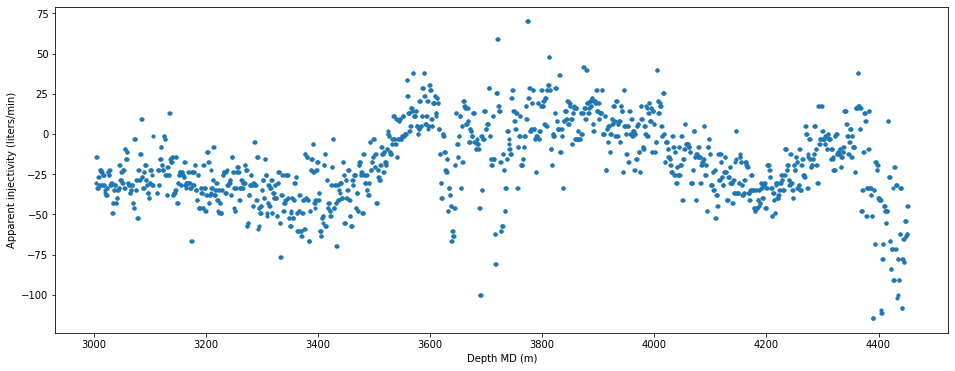

In [27]:
plt.figure(figsize=(16,6))
plt.scatter(injectivity["Depth corr"],injectivity["Apparent injectivity (liters/min)"],s=10)
plt.xlabel('Depth MD (m)')
plt.ylabel('Apparent injectivity (liters/min)')
plt.show()

## Merge

In [33]:
data = pd.merge(drilling,GR,how='left',left_on='Bit depth (m)', right_on='Depth MD (m)')

In [34]:
data = pd.merge(data,injectivity,how='left',left_on='Bit depth (m)', right_on='Depth corr')

In [35]:
data.dropna(inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279 entries, 4 to 31888
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bit depth (m)                      2279 non-null   float64
 1   Total RPM                          2279 non-null   float64
 2   Hook height (m)                    2279 non-null   float64
 3   Torque on bit (lbf.ft)             2279 non-null   float64
 4   Tension (klbf)                     2279 non-null   float64
 5   Motor RPM                          2279 non-null   float64
 6   Mud flow (l/mn)                    2279 non-null   float64
 7   SPP (psi)                          2279 non-null   float64
 8   RPM top (rpm)                      2279 non-null   float64
 9   Surface Torque (lbf.ft)            2279 non-null   float64
 10  ROP (m/h)                          2279 non-null   float64
 11  WOB (klbf)                         2279 non-null   floa

In [38]:
data.drop(["Depth MD (m)","Depth corr"],axis=1,inplace=True)

## Exploration

In [39]:
data["Bit depth (m)"].value_counts()

3484.0    12
3249.0    10
3233.8     9
3218.0     9
3251.8     8
          ..
4178.2     1
3889.2     1
3923.8     1
3805.0     1
4233.8     1
Name: Bit depth (m), Length: 878, dtype: int64

In [40]:
len(data["Bit depth (m)"].unique())

878

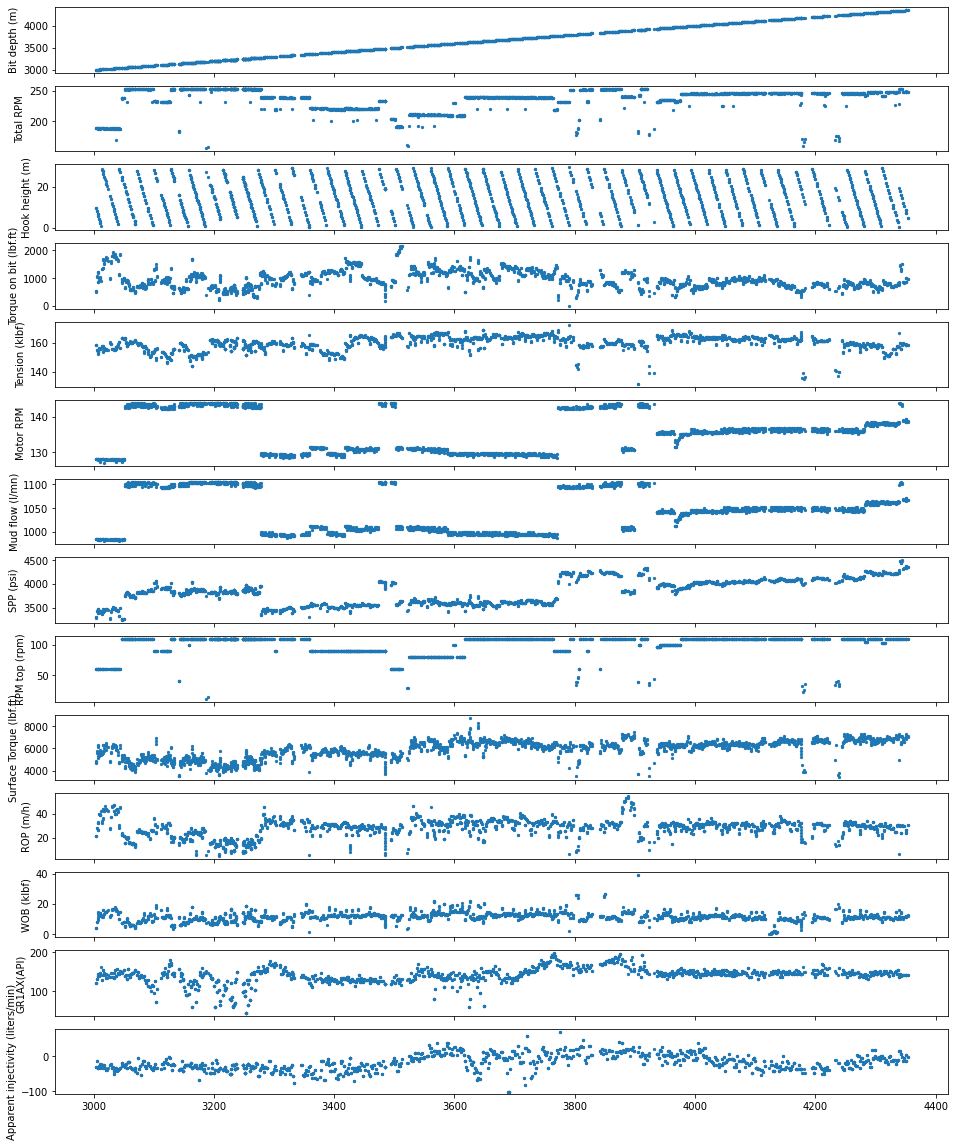

In [41]:
fig,ax = plt.subplots(len(data.columns),1,sharex=True,figsize=(16,20))

for i in range(len(list(data.columns))):
    ax[i].scatter(data["Bit depth (m)"],data[list(data.columns)[i]],s=5)
    ax[i].set_ylabel(list(data.columns)[i])

plt.show()

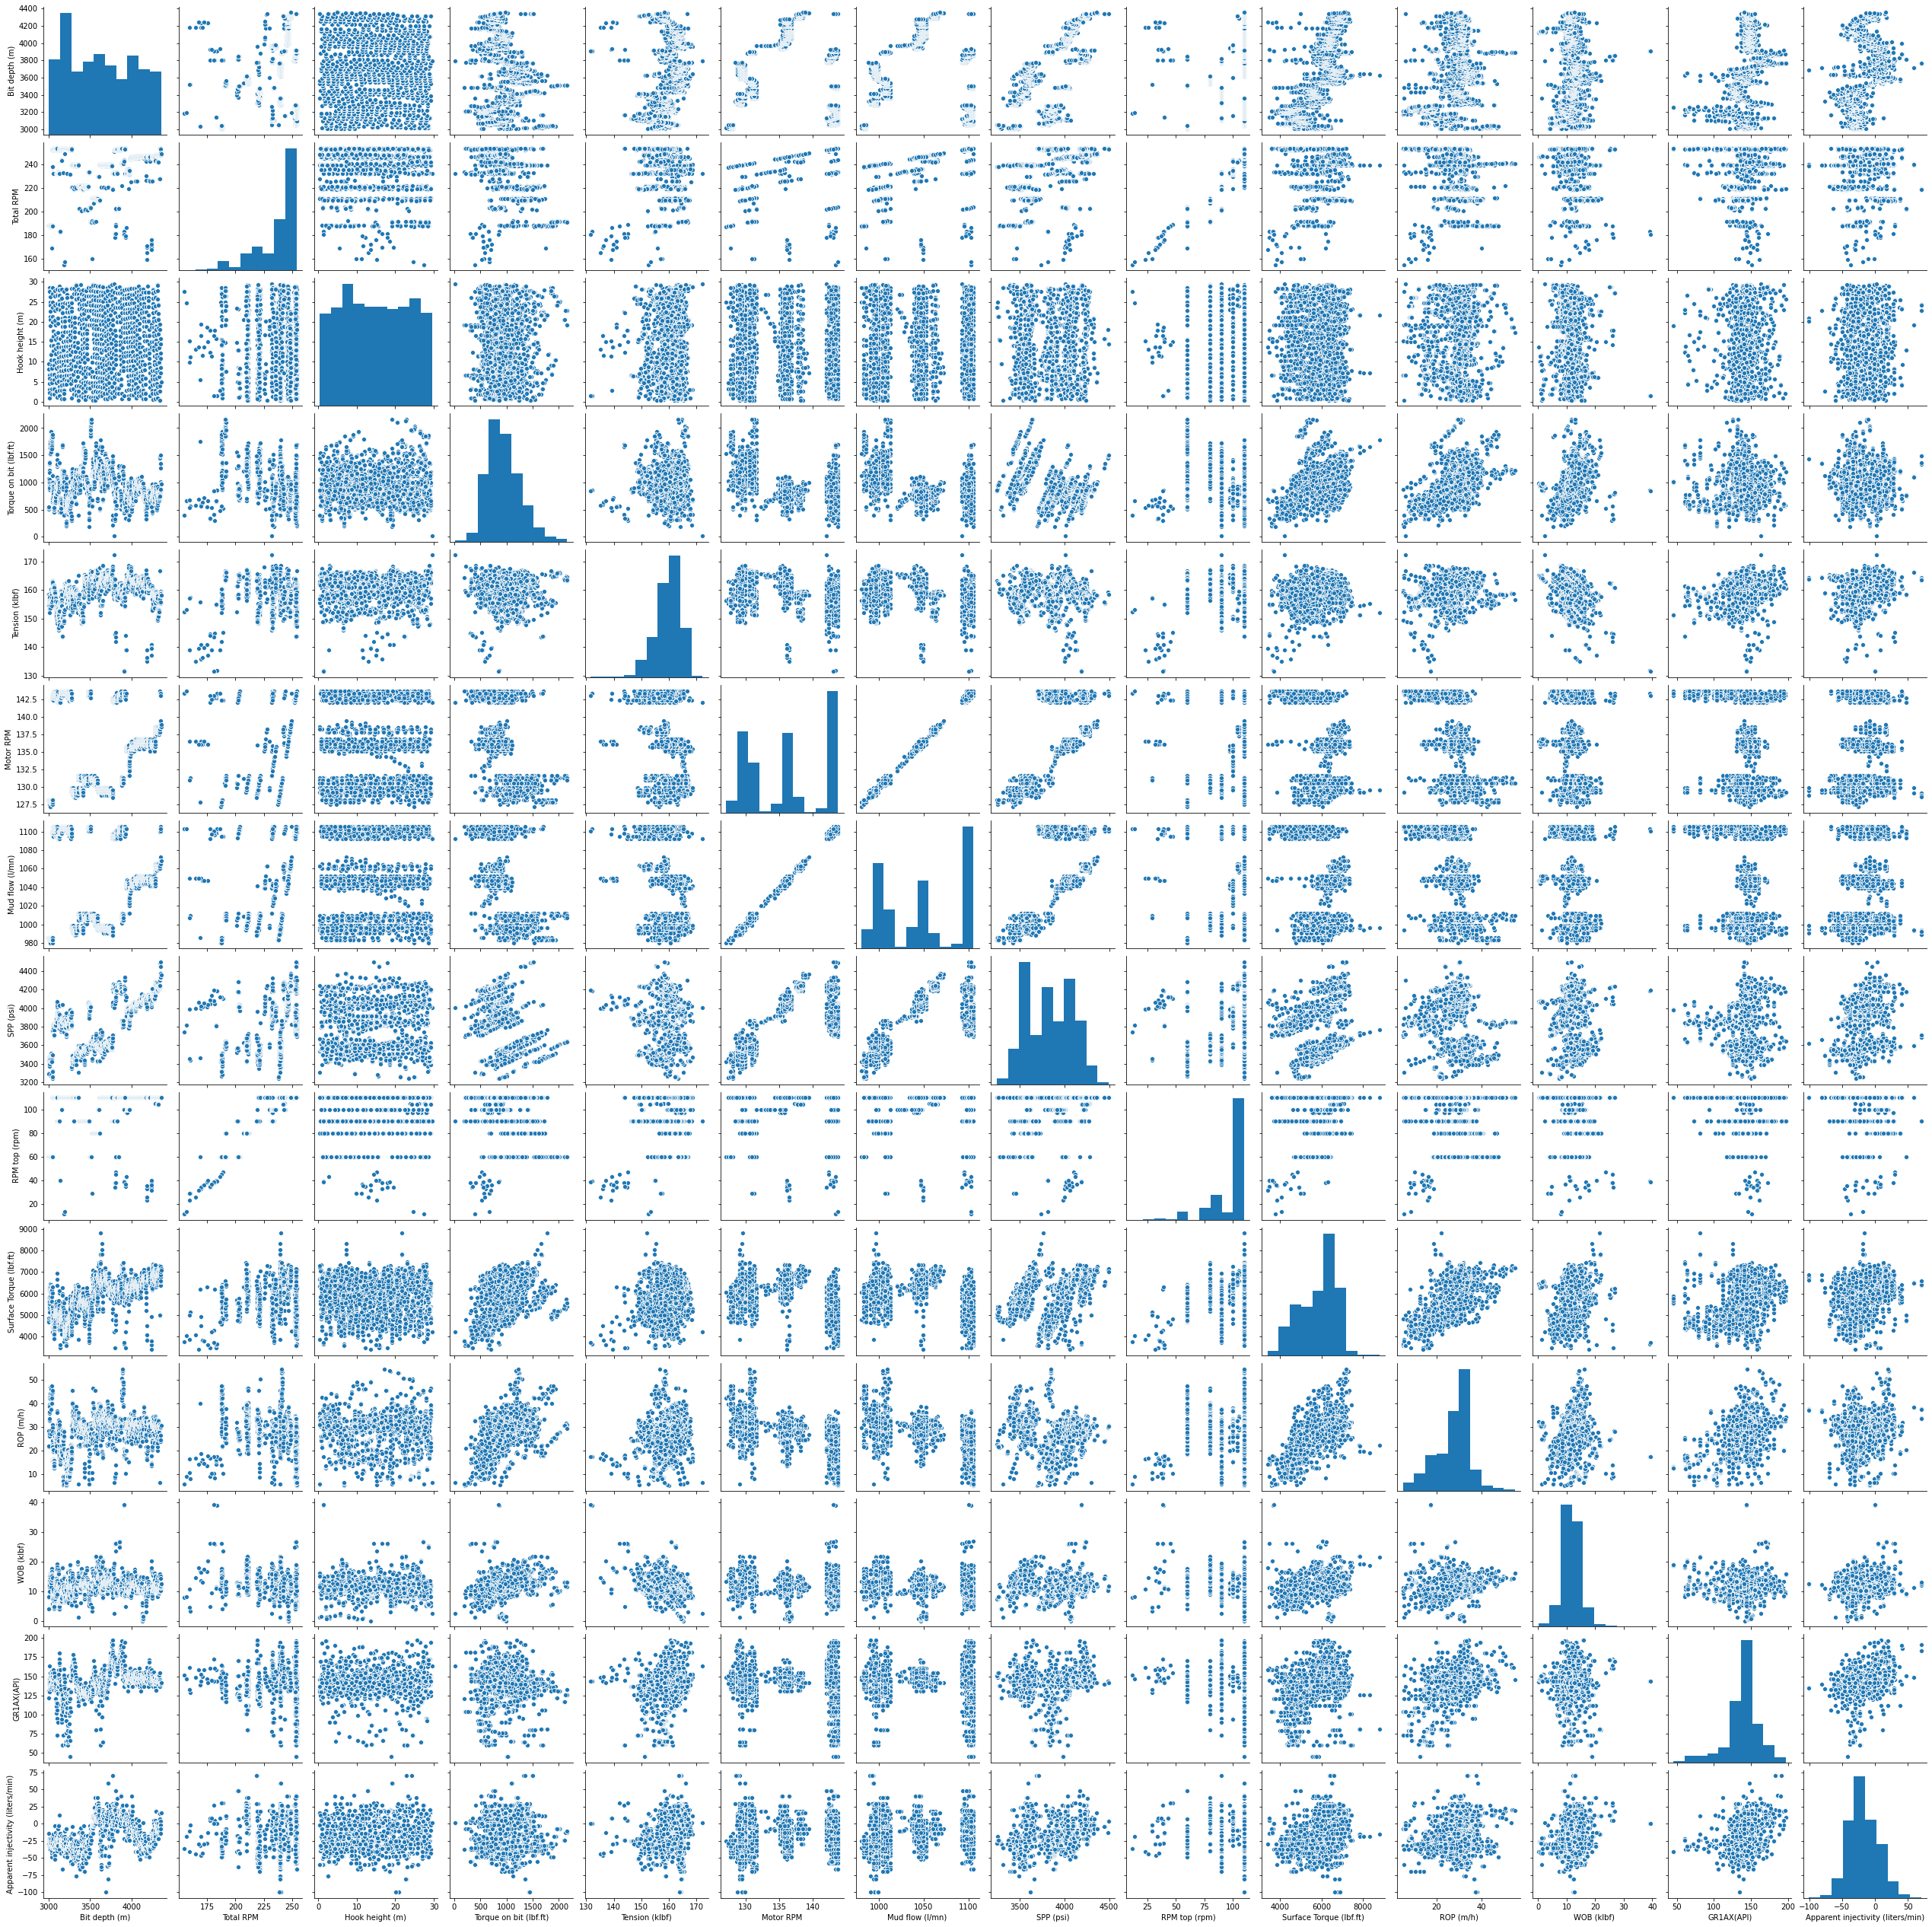

In [204]:
sns.pairplot(data)
plt.show()

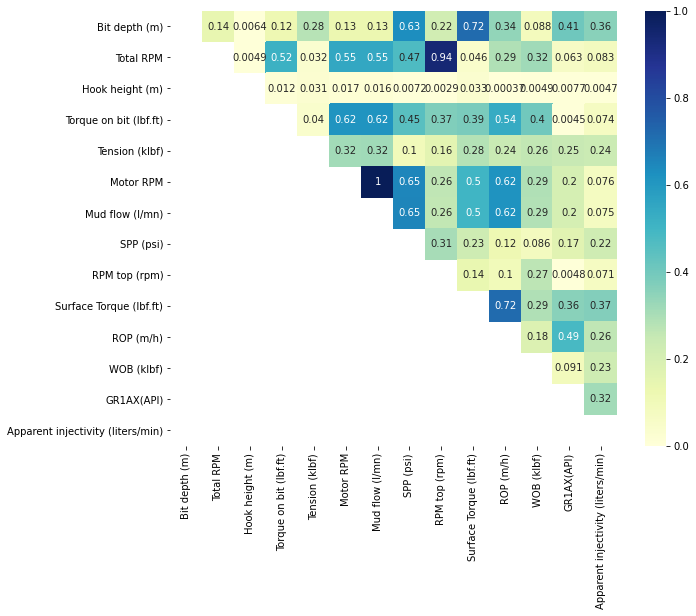

In [42]:
upper = data.corr().abs().where(np.triu(np.ones(data.corr().abs().shape),k=1).astype(bool))
plt.figure(figsize=(10,8))
sns.heatmap(upper,annot=True,cmap="YlGnBu",vmin=0,vmax=1)
plt.show()

## Transformation

In [43]:
data_analysis = data.drop(["Bit depth (m)","Hook height (m)","Motor RPM","RPM top (rpm)"],axis=1)
data_analysis

Total RPM  Torque on bit (lbf.ft)  Tension (klbf)  Mud flow (l/mn)  \
4        188.138               511.50416         158.599          985.680   
5        188.138               529.84220         158.624          985.680   
6        188.138               553.82183         158.519          985.680   
45       188.069              1032.67524         155.125          985.147   
46       188.138              1074.08520         154.855          985.680   
...          ...                     ...             ...              ...   
31826    249.394               997.43541         158.188         1072.260   
31827    248.528               997.38945         158.045         1068.264   
31828    248.528              1015.25640         158.141         1068.797   
31887    248.528               979.46122         158.244         1068.264   
31888    248.874               974.46690         158.255         1068.264   

       SPP (psi)  Surface Torque (lbf.ft)  ROP (m/h)  WOB (klbf)  GR1AX(API)  \
4       3289.976                 4860.051     21.423       4.013       121.3   
5       3297.894                 4750.049     21.719       4.013       121.3   
6       3296.394                 4694.049     22.015       4.067       121.3   
45      3429.188                 5809.260     28.380       8.016       130.6   
46      3441.779                 5610.058     28.526       8.283       130.6   
...          ...                      ...        ...         ...         ...   
31826   4368.399                 7033.406     26.881      11.682       141.2   
31827   4370.026                 6996.073     26.420      11.734       141.2   
31828   4369.908                 7265.276     26.542      11.706       141.2   
31887   4360.349                 7162.074     30.801      12.441       141.2   
31888   4361.187                 7068.074     30.528      12.602       141.2   

       Apparent injectivity (liters/min)  
4                                 -30.21  
5                                 -30.21  
6                                 -30.21  
45                                -14.31  
46                                -14.31  
...                                  ...  
31826                             -14.31  
31827                             -14.31  
31828                             -14.31  
31887                              -1.59  
31888                              -1.59  

[2279 rows x 10 columns]

## Train test split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train, test = train_test_split(data_analysis,train_size = 0.8)

X_train = train.drop(["Apparent injectivity (liters/min)"],axis=1)
y_train = train["Apparent injectivity (liters/min)"]

X_test = test.drop(["Apparent injectivity (liters/min)"],axis=1)
y_test = test["Apparent injectivity (liters/min)"]

## Preprocessing

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
transformer = MinMaxScaler()

transformer.fit(X_train)

X_train_scaled = transformer.transform(X_train)

## Modelling shortlist

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [53]:
model1 = DecisionTreeRegressor(max_depth=5,min_samples_split=50)

model1.fit(X_train_scaled,y_train)
model1.score(X_train_scaled,y_train)

0.42119145814977643

In [54]:
X_test_scaled = transformer.transform(X_test)

model1.score(X_test_scaled,y_test)

0.41858791320964495

In [55]:
model1.feature_importances_

array([0.10377456, 0.        , 0.12288545, 0.02449718, 0.24378366,
       0.36176055, 0.        , 0.04066512, 0.10263349])

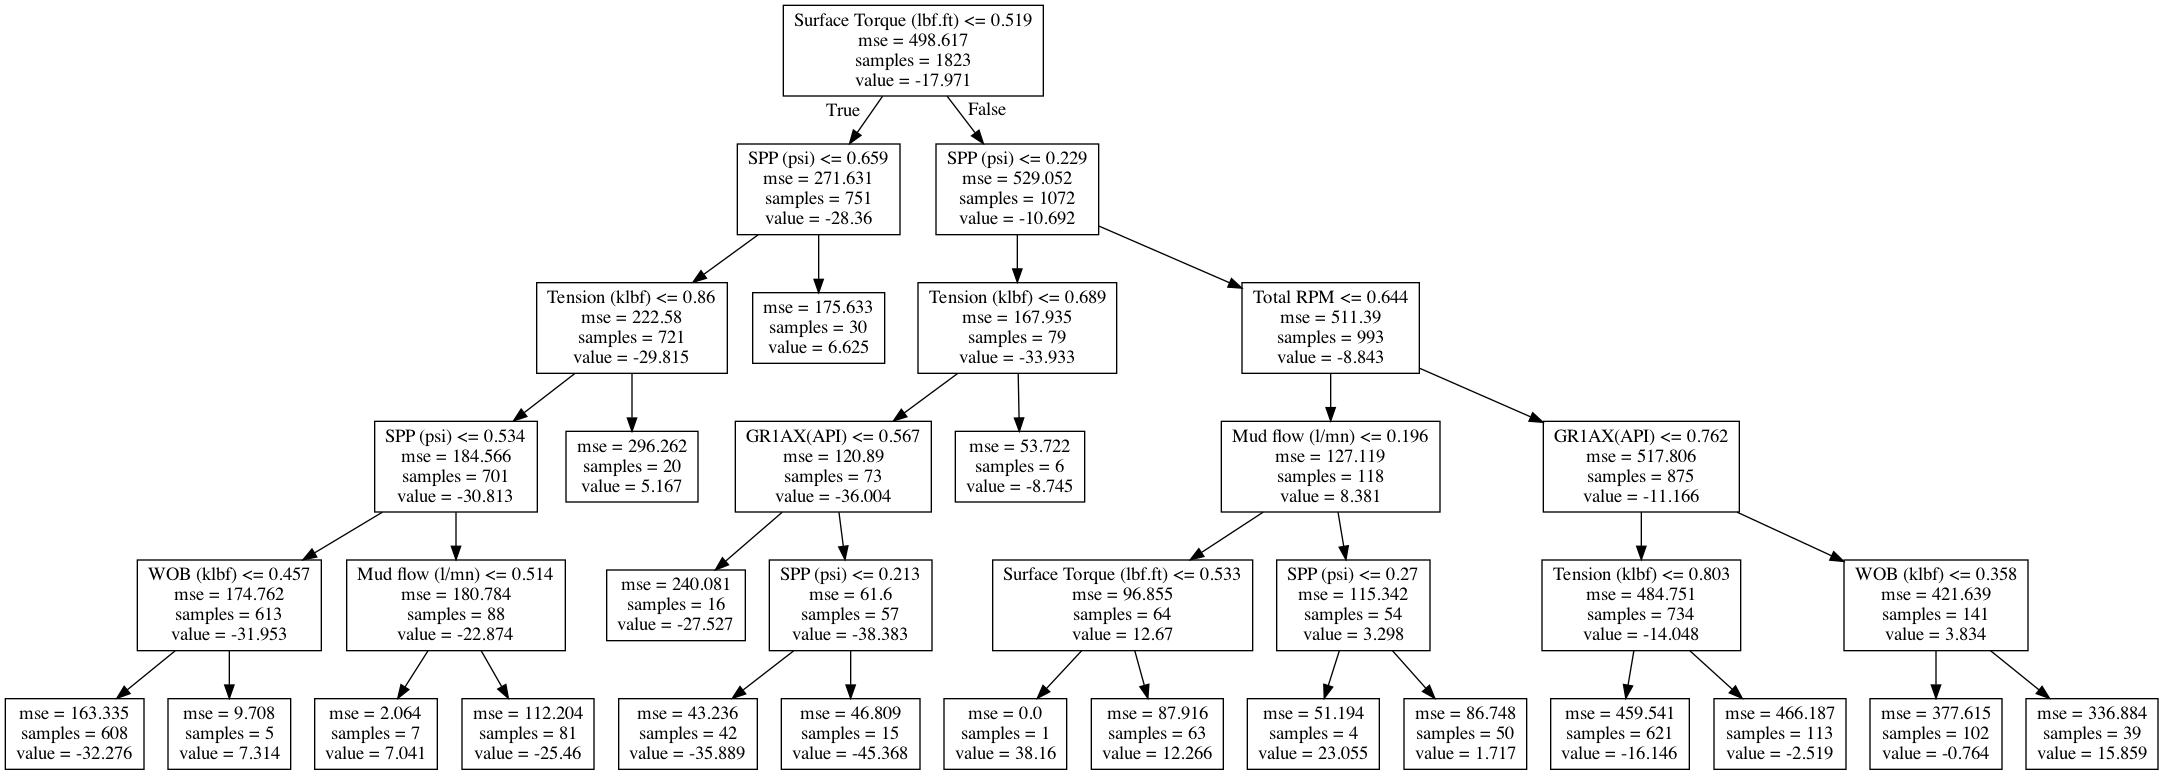

In [56]:
from IPython.display import Image
import pydotplus
from sklearn import tree

# Create DOT data
dot_data = tree.export_graphviz(model1, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=train.columns[-1])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())